In [2]:
import os
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Image size analysis

In [3]:
OBJECTS_ROOT = r"/home/shared/datasets/pollen_dataset_2024_08_14_objects_clean"

In [4]:
target_path = "./"

In [11]:
colors = [
    '#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', 
    '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00', 
    '#cab2d6', '#6a3d9a', '#ffff99', '#b15928',
    '#8dd3c7', '#c0eb34', '#4b6094', '#9db6f5',
    '#f59de3', '#854154'
]

colors = ['#9F18B3']

In [12]:
data = []
for species in os.listdir(OBJECTS_ROOT):
    species_dir = os.path.join(OBJECTS_ROOT, species)
    
    if os.path.isdir(species_dir):
        for img_name in os.listdir(species_dir):
            img_path = os.path.join(species_dir, img_name)
            
            if os.path.isfile(img_path):
                try:
                    with Image.open(img_path) as img:
                        width, height = img.size
                        
                    data.append({
                        "Species": species,
                        "Width, px": width,
                        "Height, px": height
                    })
                except Exception as e:
                    pass
pollen_df = pd.DataFrame(data)

In [7]:
pollen_df.head()

,Species,"Width, px","Height, px"
0,Alnus,159,160
1,Alnus,163,160
2,Alnus,169,177
3,Alnus,159,161
4,Alnus,164,167


In [14]:
grouped = pollen_df.groupby('Species')

stats = grouped.agg({
    'Width, px': ['mean', 'median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.5), lambda x: x.quantile(0.75)],
    'Height, px': ['mean', 'median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.5), lambda x: x.quantile(0.75)]
})
stats.columns = ['width_mean', 'width_median', 'width_q25', 'width_q50', 'width_q75',
                 'height_mean', 'height_median', 'height_q25', 'height_q50', 'height_q75']

stats

,width_mean,width_median,width_q25,width_q50,width_q75,height_mean,height_median,height_q25,height_q50,height_q75
Species,,,,,,,,,,
Acer,196.898734,196.5,184.00,196.5,208.00,195.515823,194.0,182.00,194.0,206.00
Alnus,158.669903,158.0,151.00,158.0,165.50,157.291262,156.0,149.00,156.0,164.50
Apiaceae,136.687023,140.0,115.00,140.0,157.00,136.564885,140.0,118.00,140.0,155.50
Artemisia,136.652893,136.5,130.00,136.5,143.00,135.442149,135.0,129.00,135.0,142.00
Betula,147.614634,147.0,141.00,147.0,152.00,148.453659,148.0,143.00,148.0,153.00
Chenopodiaceae,164.006667,164.0,160.00,164.0,169.00,163.233333,163.0,159.00,163.0,168.00
Corylus,172.486301,173.0,165.00,173.0,180.75,173.424658,173.0,165.00,173.0,179.75
Fraxinus,165.548387,166.0,159.00,166.0,171.00,167.043011,164.5,160.00,164.5,172.00
Picea,565.353535,577.0,473.50,577.0,648.00,496.545455,482.0,436.50,482.0,547.50


/tmp/ipykernel_127614/476205318.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=pollen_df, x='Species', y=feature, palette=colors, log_scale=(False, False), split=True, inner="quart")
/tmp/ipykernel_127614/476205318.py:3: UserWarning: 
The palette list has fewer values (1) than needed (18) and will cycle, which may produce an uninterpretable plot.
  ax = sns.violinplot(data=pollen_df, x='Species', y=feature, palette=colors, log_scale=(False, False), split=True, inner="quart")


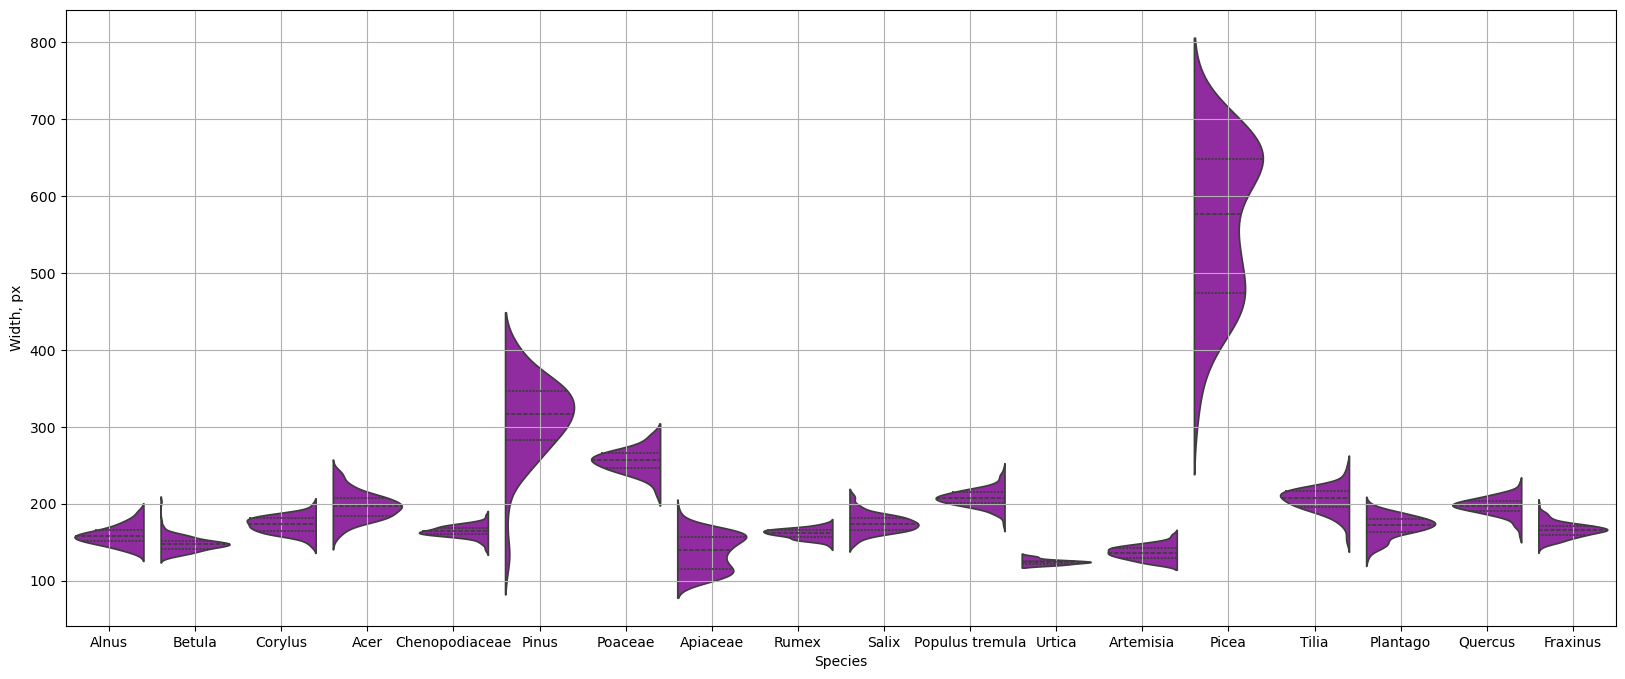

/tmp/ipykernel_127614/476205318.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=pollen_df, x='Species', y=feature, palette=colors, log_scale=(False, False), split=True, inner="quart")
/tmp/ipykernel_127614/476205318.py:3: UserWarning: 
The palette list has fewer values (1) than needed (18) and will cycle, which may produce an uninterpretable plot.
  ax = sns.violinplot(data=pollen_df, x='Species', y=feature, palette=colors, log_scale=(False, False), split=True, inner="quart")


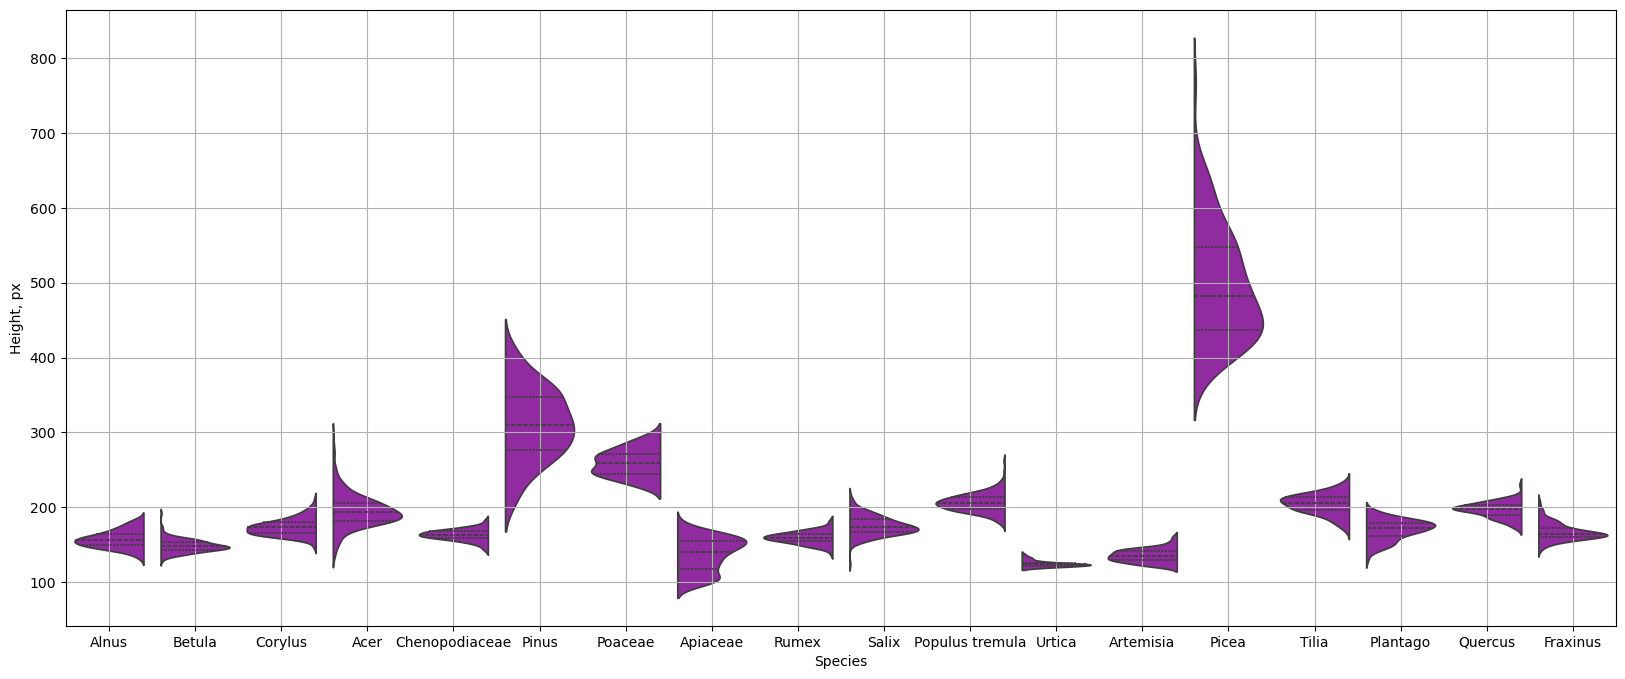

In [15]:
for feature in pollen_df.columns[1:]:
    plt.figure(figsize=(20,8))
    ax = sns.violinplot(data=pollen_df, x='Species', y=feature, palette=colors, log_scale=(False, False), split=True, inner="quart")
    # plt.savefig(os.path.join(target_path,
    #         "distribution_{feature}.png".format(feature=feature)), format="png", bbox_inches='tight')
    plt.grid()
    plt.show()

/tmp/ipykernel_127614/141646948.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=melted_df, x='Species', y='Value, px', palette=colors,
/tmp/ipykernel_127614/141646948.py:5: UserWarning: 
The palette list has fewer values (1) than needed (18) and will cycle, which may produce an uninterpretable plot.
  ax = sns.violinplot(data=melted_df, x='Species', y='Value, px', palette=colors,


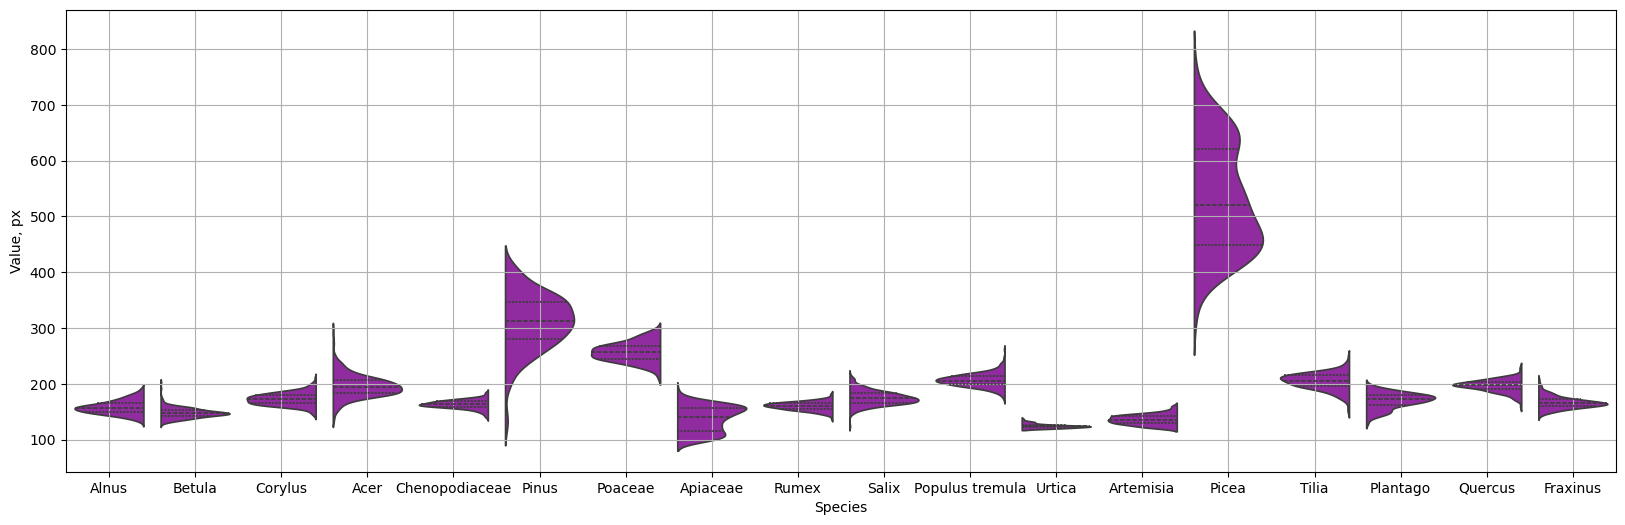

In [16]:
feature= 'width-height'
melted_df = pollen_df.melt(id_vars=['Species'], value_vars=['Width, px', 'Height, px'], 
                           var_name='Feature', value_name='Value, px')
plt.figure(figsize=(20, 6))
ax = sns.violinplot(data=melted_df, x='Species', y='Value, px', palette=colors, 
                    log_scale=(False, False), split=True, inner="quart")

plt.grid()
plt.savefig(os.path.join(target_path, "distribution_{feature}.png".format(feature=feature)), format="png", bbox_inches='tight')
plt.show()

In [17]:
melted_df['Value, px'].max()

767

In [18]:
grouped = melted_df.groupby('Species')

stats = grouped.agg({
    'Value, px': ['mean', 'median', lambda x: x.quantile(0.95)],
})
stats.columns = ['mean', 'median', 'q95']

stats

,mean,median,q95
Species,,,
Acer,196.207278,195.0,232.00
Alnus,157.980583,157.0,179.00
Apiaceae,136.625954,140.0,167.95
Artemisia,136.047521,136.0,150.00
Betula,148.034146,147.5,162.00
Chenopodiaceae,163.620000,164.0,175.00
Corylus,172.955479,173.0,190.45
Fraxinus,166.295699,165.0,185.45
Picea,530.949495,520.0,684.30


## Load data and model

In [ ]:
OBJECTS_ROOT = r"/home/shared/datasets/pollen_dataset_2024_08_14_objects_clean"

In [ ]:
random.seed(42)

In [ ]:
def pad2size(image, size=(224, 224)):
    return ImageOps.fit(image, size)

class PollenTripletDataset(Dataset):
    def __init__(self, img_dir, classes, 
                 static_transform=None, 
                 random_transform=None,
                 inflation_rate=1):
        self.known_classes = classes
        self.known_classes_numbers = list(range(len(classes)))
        self.known_classes.sort()
        self.transform = random_transform
        self._all_samples = []
        self._indices_to_class = {}
        self._class_to_indices = {i: [] for i,c in enumerate(self.known_classes)}
        total_samples = 0
        
        for c in tqdm(self.known_classes):
            c_number = len(self._indices_to_class)
            self._indices_to_class[c_number] = c
            images = glob(os.path.join(img_dir, c, "*.png"))
            print(f"{len(images)} samples in the class {c}")
            
            for idx, img_path in enumerate(tqdm(images)):
                img = Image.open(img_path)
                if static_transform is not None:
                    img = static_transform(img)
                self._all_samples.append((c_number, img))
                self._class_to_indices[c_number].append(total_samples)
                total_samples += 1
        
        print(f"Total samples: {total_samples}")

    def __len__(self):
        return len(self._all_samples)

    def __getitem__(self, idx):
        label, anchor = self._all_samples[idx]
        label_str = self._indices_to_class[label]
        
        positive_idx = random.choice(self._class_to_indices[label])
        positive = self._all_samples[positive_idx][1]
        
        neg_classes = [c for c in self.known_classes_numbers if c != label]
        negative_class = random.choice(neg_classes)
        negative_idx = random.choice(self._class_to_indices[negative_class])
        negative_label, negative = self._all_samples[negative_idx]
        negative_str = self._indices_to_class[negative_label]
        
        if self.transform:
            anchor = self.transform(anchor)
            positive = self.transform(positive)
            negative = self.transform(negative)
        
        anchor = torch.as_tensor(anchor) if not isinstance(anchor, torch.Tensor) else anchor
        positive = torch.as_tensor(positive) if not isinstance(positive, torch.Tensor) else positive
        negative = torch.as_tensor(negative) if not isinstance(negative, torch.Tensor) else negative

        return anchor, positive, negative, label, label_str, negative_label, negative_str

known_classes = os.listdir(OBJECTS_ROOT)

print(f"All known classes: {known_classes}")
train_classes, test_classes = train_test_split(known_classes, test_size=0.2, random_state=42)
train_classes, val_classes = train_test_split(train_classes, test_size=0.2, random_state=42)

print(f"Train classes: {train_classes}")
print(f"Validation classes: {val_classes}")
print(f"Test classes: {test_classes}")

input_size=(224, 224)

static_transforms = v2.Compose([
    v2.Lambda(pad2size),
    v2.PILToTensor(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


print("\nLoad Train Dataset")
dataset_train = PollenTripletDataset(OBJECTS_ROOT, train_classes, static_transform=static_transforms, inflation_rate=100)
print("\nLoad Validation Dataset")
dataset_val = PollenTripletDataset(OBJECTS_ROOT, val_classes, static_transform=static_transforms, inflation_rate=100)
print("\nLoad Test Dataset")
dataset_test = PollenTripletDataset(OBJECTS_ROOT, test_classes, static_transform=static_transforms, inflation_rate=100)

In [ ]:
train_loader = torch.utils.data.DataLoader(
    dataset_train,
    batch_size= 48,
    shuffle= True,
    num_workers= 6
)
val_loader = torch.utils.data.DataLoader(
    dataset_val, 
    batch_size= 4,
    shuffle= True,
    num_workers= 6
)
test_loader = torch.utils.data.DataLoader(
    dataset_test, 
    batch_size= 1,
    shuffle= True,
    num_workers= 6
)

In [ ]:
checkpoint_path = "/home/jovyan/git/Pollen-Analyzer/Classification/history/checkpoint-epoch=19-val_loss=0.61.ckpt"
model = PollenEmbeddingsModule.load_from_checkpoint(checkpoint_path)

In [ ]:
model.eval()
model = model.cuda()

## Metrics and quality analysis

In [ ]:
def add_class_markings(ax, class_boundaries, labels):
    tick_locs = [(class_boundaries[i] + class_boundaries[i+1] - 1) / 2 for i in range(len(class_boundaries)-1)]
    ax.set_xticks(tick_locs)
    ax.set_yticks(tick_locs)
    ax.set_xticklabels([labels[int(loc)] for loc in tick_locs])
    ax.set_yticklabels([labels[int(loc)] for loc in tick_locs])
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    for boundary in class_boundaries[1:-1]:
        ax.axhline(y=boundary-1, color='k', linestyle='-', linewidth=1)
        ax.axvline(x=boundary-1, color='k', linestyle='-', linewidth=1)

In [ ]:
def plot_matrix(embeddings_lists: list, labels_lists: list, subtitle: str=None, axes_class_markings: bool=True):
    all_labels_sorted, all_embeddings_sorted, class_boundaries = prepare_data(embeddings_lists, labels_lists)

    pairwise_dist = pairwise_distances(all_embeddings_sorted)
    fig, ax = plt.subplots(figsize=(6, 5))
    im = ax.imshow(pairwise_dist, cmap='Blues_r')
    plt.colorbar(im)

    if axes_class_markings:
        add_class_markings(ax, class_boundaries, all_labels_sorted)

    if subtitle != None:
        plt.title('Pairwise Distance Matrix\n' + subtitle)
    else:
        plt.title('Pairwise Distance Matrix')
    plt.tight_layout()
    plt.show()
    del all_labels_sorted
    del all_embeddings_sorted
    del class_boundaries

In [ ]:
def prepare_data(embeddings_lists: list, labels_lists: list):
    all_labels_sorted = []
    all_embeddings_sorted = []
    class_boundaries = [0]
    for i, embeddings_list in enumerate(embeddings_lists):
        labels_list = labels_lists[i]
        class_to_idx = {}
        for i, class_name in enumerate(np.unique(labels_list)):
            class_to_idx[class_name] = i
        all_labels_idx = [class_to_idx[label] for label in labels_list]
        sorted_indices = sorted(range(len(embeddings_list)), key=lambda i: all_labels_idx[i])
        start = len(all_labels_sorted) + 1
        all_embeddings_sorted.extend([embeddings_list[i] for i in sorted_indices])
        all_labels_sorted.extend([labels_list[i] for i in sorted_indices])
    
        for i in range(start, len(all_labels_sorted)):
            if all_labels_sorted[i] != all_labels_sorted[i-1]:
                class_boundaries.append(i)
        class_boundaries.append(len(all_labels_sorted))

    return all_labels_sorted, all_embeddings_sorted, class_boundaries

In [ ]:
def process_loader(model, loader, class_names_dict, current_index, step, pred_label_data, label_data):
    all_embeddings = []
    all_labels = []
    updater = lambda t: t + step
    with torch.no_grad():
        for batch in loader:
            imgs, _, _, labels, labels_str, _, _ = batch
            for label in labels_str:
                if label not in class_names_dict:
                    class_names_dict[label] = current_index
                    current_index += 1
            imgs = imgs.cuda()
            embeddings, cls = model(imgs)
            all_embeddings.append(embeddings.cpu())
            all_labels.extend(labels_str)
            cls_upd = np.array([xi for xi in torch.argmax(cls, dim=1).cpu().numpy()])
            pred_label_data.extend(cls_upd)
            label_upd = np.array([updater(xi) for xi in labels.cpu().numpy()])
            label_data.extend(label_upd)
        all_embeddings = torch.cat(all_embeddings, dim=0).cpu().numpy()
    return all_embeddings, all_labels, current_index, pred_label_data, label_data

In [ ]:
def process_data(model, loaders_list: list):
    embeddings_data = []
    labels_data_str = []
    pred_label_data = []
    label_data = []
    step = 0
    class_names_dict = OrderedDict()
    current_index = 0
    updater = lambda t: t + step
    for loader in tqdm(loaders_list):
        all_embeddings, all_labels, current_index, pred_label_data, label_data = process_loader(model, loader, class_names_dict, current_index, step, pred_label_data, label_data)
        embeddings_data.append(all_embeddings)
        labels_data_str.append(all_labels)
        step += np.unique(all_labels).size
        del all_embeddings
        del all_labels
    class_names = [k for k, _ in sorted(class_names_dict.items(), key=lambda item: item[1])]
    return embeddings_data, labels_data_str, pred_label_data, label_data, class_names

In [ ]:
loaders_list = [test_loader, val_loader, train_loader]
embeddings_data, labels_data_str, pred_label_data, label_data, class_names = process_data(model, loaders_list)

In [ ]:
plot_matrix(embeddings_data, labels_data_str)

In [ ]:
cm = confusion_matrix(label_data, pred_label_data)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names,
            annot_kws={"size": 10}, cbar=False)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j+0.5, i+0.5, f'\n\n{cm_percent[i, j]:.1f}%',
                 ha="center", va="center",
                 color="white" if cm[i, j] > cm.max()/2 else "black")

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy = accuracy_score(label_data, pred_label_data)

precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(label_data, pred_label_data, average='macro')
precision_micro, recall_micro, f1_micro, _ = precision_recall_fscore_support(label_data, pred_label_data, average='micro')
precision_weighted, recall_weighted, f1_weighted, _ = precision_recall_fscore_support(label_data, pred_label_data, average='weighted')

kappa = cohen_kappa_score(label_data, pred_label_data)
mcc = matthews_corrcoef(label_data, pred_label_data)
balanced_acc = balanced_accuracy_score(label_data, pred_label_data)

report = classification_report(label_data, pred_label_data, target_names=class_names)

print(f"Accuracy: {accuracy:.4f}")
print(f"Macro Precision: {precision_macro:.4f}, Recall: {recall_macro:.4f}, F1: {f1_macro:.4f}")
print(f"Micro Precision: {precision_micro:.4f}, Recall: {recall_micro:.4f}, F1: {f1_micro:.4f}")
print(f"Weighted Precision: {precision_weighted:.4f}, Recall: {recall_weighted:.4f}, F1: {f1_weighted:.4f}")
print(f"Cohen's Kappa: {kappa:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print("\nClassification Report:")
print(report)